In [2]:
import Pkg 

In [ ]:
Pkg.add("AbstractAlgebra")

In [ ]:
Pkg.add("Random")

In [ ]:
Pkg.add("Permutations")

In [ ]:
Pkg.add("CairoMakie")

In [1]:
using AbstractAlgebra, Random, Permutations
b=3
F = GF(b)
m = 3
s = 2
ρ = m 
t = m - ρ 
N = b^m

27

In [2]:
#all_perms = collect(PermGen(m)) 
#number_perm = length(all_perms)
#@show number_perm
# inds = rand(1:length(all_perms), s)
#@show inds = (1,120)
#C = [Matrix(all_perms[i]) for i in inds]


In [3]:
badic = collect(Iterators.product(fill(0:b-1, m)...))[:]

27-element Vector{Tuple{Int64, Int64, Int64}}:
 (0, 0, 0)
 (1, 0, 0)
 (2, 0, 0)
 (0, 1, 0)
 (1, 1, 0)
 (2, 1, 0)
 (0, 2, 0)
 (1, 2, 0)
 (2, 2, 0)
 (0, 0, 1)
 ⋮
 (0, 0, 2)
 (1, 0, 2)
 (2, 0, 2)
 (0, 1, 2)
 (1, 1, 2)
 (2, 1, 2)
 (0, 2, 2)
 (1, 2, 2)
 (2, 2, 2)

In [4]:
function norm_coord(v,b)
    v_1 = 0.0
    bf = float(b)
    for i in eachindex(v)
        v_1 += v[i] * bf^(-i)
    end
    return v_1
end


norm_coord (generic function with 1 method)

In [5]:
using Test
@test norm_coord([1 1 0 1],2) == 13/16

Test Passed

In [6]:
# norm_coord( AbstractAlgebra.lift.( C_2*collect(badic[4]) ),2)  # you need to convert Tuples to vectors matrix mult...
# C_r2*collect(badic[4])

# Hi Vishnu:   Ok, it is kind of logical: If you compute in a finite field, you need to apply the map from Fq to R to make this computation
# work. This map is called 'lift'. So, you need to apply lift to the vector you want to compute with.

In [7]:
function point_gen(C,n,b)
    #v = [norm_coord(c*n,b) for c in C]
    v = [norm_coord(AbstractAlgebra.lift.(c*n),b) for c in C]  # you need to apply lift here! Like this? yes! Yay now the plot looks correct! Juhu! 
    return v
end

point_gen (generic function with 1 method)

In [8]:
function gen_all_points(C,b)
    badic = collect(Iterators.product(fill(0:b-1, m)...))[:]
    pts = [point_gen(C,collect(n),b) for n in badic]
    return pts
end

gen_all_points (generic function with 1 method)

In [9]:
vol(z) = prod(z)
vol_h(z, pts) = count( all(p .< z) for p in pts ) / length(pts)
δ(z,pts) = vol_h(z, pts) - vol(z)

δ (generic function with 1 method)

In [10]:
function is_NNLD(c_z, s, pts)
    NNLD = true
    for i in 1:c_z 
        z = rand(s)
        if δ(z,pts) < 0
            @show z
            NNLD = false
            break
        end
    end
    return NNLD
end


is_NNLD (generic function with 1 method)

In [42]:
#Testing 851,849
C_1 = [[2 1 1];[1 1 0]; [1 0 0]]
C_2 = [[0 1 1];[1 1 0]; [1 0 0]]
C_1, C_2 = F.(C_1), F.(C_2)
C = [C_1,C_2]

2-element Vector{Matrix{AbstractAlgebra.GFElem{Int64}}}:
 [2 1 1; 1 1 0; 1 0 0]
 [0 1 1; 1 1 0; 1 0 0]

In [30]:
# Testing 998,904
C_r1 = [[2 0 1];[2 0 0]; [2 1 0]]
C_r2 = [[1 0 1];[1 2 0];[1 0 0] ]
C_r1, C_r2 = F.(C_r1), F.(C_r2)
C_r = [C_r1,C_r2]

2-element Vector{Matrix{AbstractAlgebra.GFElem{Int64}}}:
 [2 0 1; 2 0 0; 2 1 0]
 [1 0 1; 1 2 0; 1 0 0]

In [31]:
# Faure sequence net for s=2, m=5 and b=2. This is not an NNLD net.
#C_1 = [[1 0 0 0 0];[0 1 0 0 0]; [0 0 1 0 0]; [0 0 0 1 0]; [0 0 0 0 1]]
#C_2 = [[1 1 1 1 1]; [0 1 0 1 0]; [0 0 1 1 0]; [0 0 0 1 0]; [0 0 0 0 1]]
#C_1, C_2 = F.(C_1), F.(C_2)
#C = [C_1,C_2]

In [43]:
gen_all_points(C,b)
pts = gen_all_points(C,b)

27-element Vector{Vector{BigFloat}}:
 [0.0, 0.0]
 [0.814814814814814776522400308067517471499741077423095703125, 0.148148148148148146863167795572735485620796680450439453125]
 [0.62962962962962960855595184739286196418106555938720703125, 0.29629629629629629372633559114547097124159336090087890625]
 [0.4444444444444444197728216749965213239192962646484375, 0.4444444444444444197728216749965213239192962646484375]
 [0.259259259259259251806373214321865816600620746612548828125, 0.592592592592592566635989470569256809540092945098876953125]
 [0.74074074074074071349915726614199229516088962554931640625, 0.40740740740740739866954100989460130222141742706298828125]
 [0.888888888888888839545643349993042647838592529296875, 0.888888888888888839545643349993042647838592529296875]
 [0.370370370370370356749578633070996147580444812774658203125, 0.703703703703703671579194889318387140519917011260986328125]
 [0.18518518518518518878313017239634064026176929473876953125, 0.851851851851851818442362684891122626140713691

In [44]:
pts_unq= unique(pts)
nu_pts_unq=length(pts_unq)

27

In [34]:
gen_all_points(C_r,b)
pts_r = gen_all_points(C_r,b)

27-element Vector{Vector{BigFloat}}:
 [0.0, 0.0]
 [0.96296296296296292338556810364025295712053775787353515625, 0.481481481481481461692784051820126478560268878936767578125]
 [0.481481481481481461692784051820126478560268878936767578125, 0.96296296296296292338556810364025295712053775787353515625]
 [0.037037037037037041919962376823605154640972614288330078125, 0.22222222222222220988641083749826066195964813232421875]
 [0.888888888888888839545643349993042647838592529296875, 0.370370370370370356749578633070996147580444812774658203125]
 [0.51851851851851850361274642864373163320124149322509765625, 0.85185185185185181844236268489112262614071369171142578125]
 [0.07407407407407408383992475364721030928194522857666015625, 0.111111111111111104943205418749130330979824066162109375]
 [0.925925925925925881465605726816647802479565143585205078125, 0.592592592592592566635989470569256809540092945098876953125]
 [0.4444444444444444197728216749965213239192962646484375, 0.74074074074074071349915726614199229516088

In [35]:
z_1 = [0.25,0.25]
pts_1 = [pts[3], pts[5],pts[9]]
vol(z_1)
vol_h(z_1,pts_1)
δ(z_1,pts_1)


-0.0625

In [45]:
#Faure sequence is not NNLD!
is_NNLD(50, 2, pts)

z = [0.6574931185301929, 0.6950906473886495]


false

In [37]:
is_NNLD(50, 2, pts_r)

z = [0.9614500310321918, 0.6173937016432741]


false

In [32]:
using CairoMakie
set_theme!(theme_ggplot2())

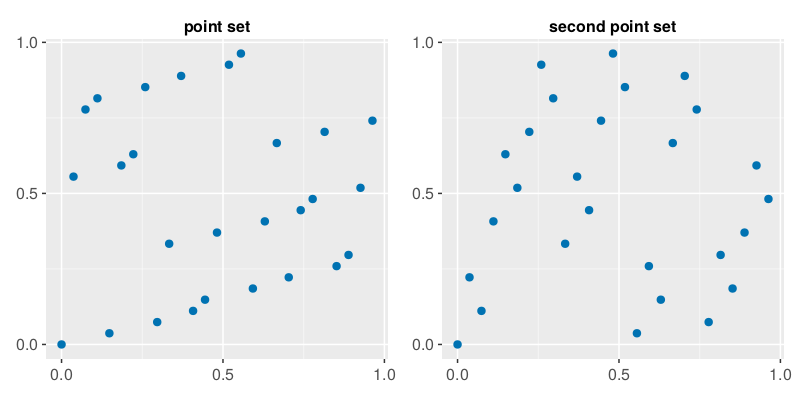

In [33]:
fig = Figure(resolution = (800, 400))
ax = Axis(fig[1,1], title = "point set")
scatter!( Point2.(pts) )

ax = Axis(fig[1,2], title = "second point set")
scatter!( Point2.(pts_r) )
fig

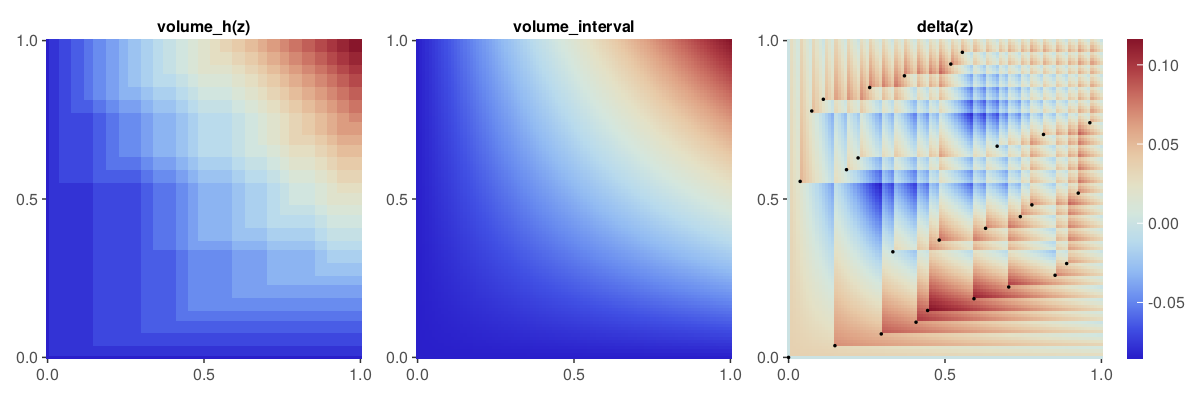

In [22]:
x = LinRange(0,1,100)
y = LinRange(0,1,100)
fig = Figure(resolution = (1200, 400))
ax = Axis(fig[1,1], title="volume_h(z)")
A = [vol_h((a,b),pts[1:end]) for a in x, b in y]
heatmap!(x,y, A, colormap = "thermometer"  )

ax = Axis(fig[1,2], title = "volume_interval")
B = [a*b for a in x, b in y]
heatmap!(x,y, B,colormap = "thermometer")

ax = Axis(fig[1,3], title = "delta(z)")
hm = heatmap!(x,y, A-B,colormap = "thermometer"  )
scatter!( Point2.(pts), color = :black, markersize = 5 )
Colorbar(fig[1,4], hm)
fig